# Dataset Description
This section will encompass exploratory and descriptive steps of inspecting the created dataset. 

In [5]:
import os
import matplotlib.pyplot as plt
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from anytree.dotexport import RenderTreeGraph

def build_folder_tree(base_path):
    """
    Builds a tree structure using anytree to represent the folder hierarchy.

    Args:
        base_path (str): The root path to start walking the directory structure.
    
    Returns:
        Node: The root node of the tree structure.
    """
    # Create a root node for the tree
    root_name = os.path.basename(base_path.rstrip(os.sep))
    root = Node(root_name)

    # Recursively walk the directory and add nodes
    node_dict = {base_path: root}
    for root_path, dirs, _ in os.walk(base_path):
        parent_node = node_dict[root_path]
        for d in dirs:
            dir_path = os.path.join(root_path, d)
            dir_node = Node(d, parent=parent_node)
            node_dict[dir_path] = dir_node

    return root

def plot_tree_hierarchy(root_node):
    """
    Plots a tree structure using matplotlib.

    Args:
        root_node (Node): The root node of the tree structure.
    """
    # Render the tree hierarchy
    tree_lines = []
    for pre, _, node in RenderTree(root_node):
        tree_lines.append(f"{pre}{node.name}")

    # Display the tree in a Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, len(tree_lines) * 0.5))
    ax.axis('off')
    ax.text(0, 1, '\n'.join(tree_lines), fontsize=10, va="top", family="monospace")
    plt.show()


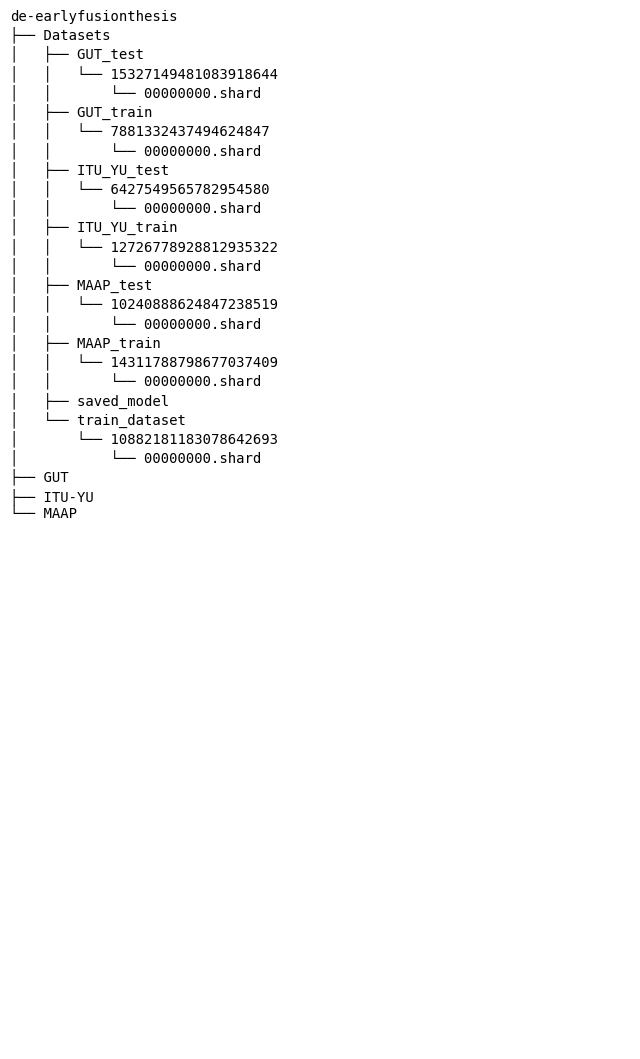

In [6]:
path = r"Z:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis"
root_node = build_folder_tree(path)
plot_tree_hierarchy(root_node)